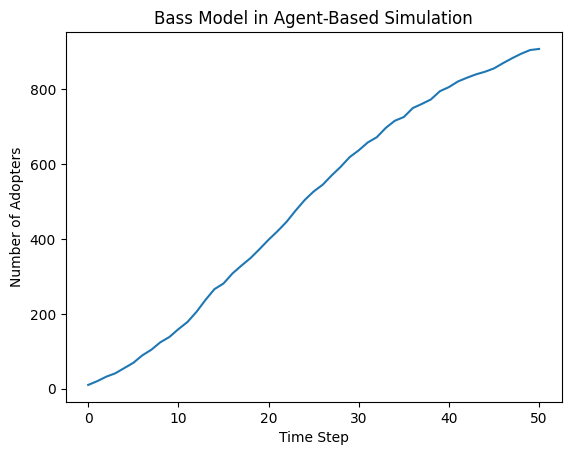

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameter settings
p = 0.01  # Innovation coefficient
q = 0.08  # Imitation coefficient
total_agents = 1000  # Total number of agents
time_steps = 50  # Simulation time steps

# Create a random network
G = nx.erdos_renyi_graph(total_agents, 0.05)

# Initialize agent states: 0 means not adopted, 1 means adopted
state = np.zeros(total_agents)

# Initialize innovators
initial_adopters = np.random.choice(total_agents, size=int(p * total_agents), replace=False)
state[initial_adopters] = 1

# Record the number of cumulative adopters at each time step
adoption_over_time = [np.sum(state)]

for t in range(time_steps):
    new_adopters = []
    for agent in range(total_agents):
        if state[agent] == 0:  # Consider only those who have not adopted
            neighbors = list(G.neighbors(agent))
            num_adopted_neighbors = np.sum(state[neighbors])
            if np.random.rand() < p + q * (num_adopted_neighbors / len(neighbors)):
                new_adopters.append(agent)
    for agent in new_adopters:
        state[agent] = 1
    adoption_over_time.append(np.sum(state))

# Plot the results
plt.plot(adoption_over_time)
plt.xlabel('Time Step')
plt.ylabel('Number of Adopters')
plt.title('Bass Model in Agent-Based Simulation')
plt.show()


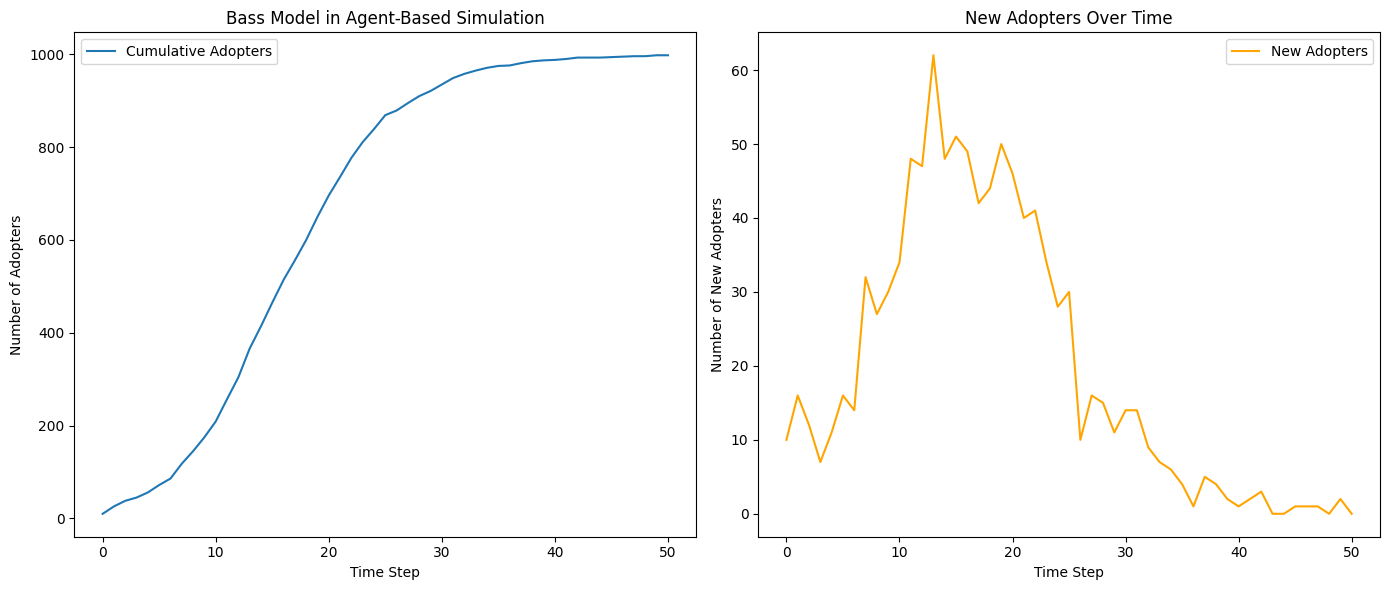

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameter settings
p = 0.01  # Innovation coefficient
q = 0.18  # Imitation coefficient
total_agents = 1000  # Total number of agents
time_steps = 50  # Simulation time steps

# Create a random network
G = nx.erdos_renyi_graph(total_agents, 0.1)

# Initialize agent states: 0 means not adopted, 1 means adopted
state = np.zeros(total_agents)

# Initialize innovators
initial_adopters = np.random.choice(
    total_agents, size=int(p * total_agents), replace=False)
state[initial_adopters] = 1

# Record the number of cumulative adopters and new adopters at each time step
adoption_over_time = [np.sum(state)]
# Initially all adopters are new adopters
new_adopters_over_time = [np.sum(state)]

for t in range(time_steps):
    new_adopters = []
    for agent in range(total_agents):
        if state[agent] == 0:  # Consider only those who have not adopted
            neighbors = list(G.neighbors(agent))
            num_adopted_neighbors = np.sum(state[neighbors])
            if np.random.rand() < p + q * (num_adopted_neighbors / len(neighbors)):
                new_adopters.append(agent)
    for agent in new_adopters:
        state[agent] = 1
    adoption_over_time.append(np.sum(state))
    new_adopters_over_time.append(len(new_adopters))

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(adoption_over_time, label='Cumulative Adopters')
plt.xlabel('Time Step')
plt.ylabel('Number of Adopters')
plt.title('Bass Model in Agent-Based Simulation')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(new_adopters_over_time, label='New Adopters', color='orange')
plt.xlabel('Time Step')
plt.ylabel('Number of New Adopters')
plt.title('New Adopters Over Time')
plt.legend()

plt.tight_layout()
plt.show()